In [1]:
import networkx as nx
import ipdb

#utils ......................................

def nodeToNums(node):
    if node == None:
        return {}
    if type(node) == set:
        return node
    node = node[1:-1]
    node = node.replace(' ', '')
    nums = node.split(',')
    res = set()
    for n in nums:
        if n.isdecimal:
            res.add(int(n))
    return res


def mergeCycleDicts(c1, c2):
    res = c1.copy()
    for i in c2:
        if not i in c1:
            res[i] = c2[i]
        else:
            for j in c2[i]:
                res[i].append(j)
    return res

def isSubsetOfAny(sets, l):
    for s in sets:
        if l <= s:
            return True
    return False

def makeMergedNodeName(c):
    name = set()
    for n in c:
        name = name | nodeToNums(n)
    name = str(name)
    return name

def getCurrentNode(G, n):
    if n in G:
        return n
    for node in G:
        if nodeToNums(n) < nodeToNums(node):
            return node
    return None

In [39]:
def getCycle(G, node, stack):
    #print("stack", stack, "node", node)
    if node in stack:
        i = stack.index(node)
        print("cycle:", stack[i:]+[node])
    else:
        stack.append(node)
        for nei in G.neighbors(node):
            getCycle(G, nei, stack)
        stack.pop()
        

In [41]:
g = nx.DiGraph()
g.add_edge(0, 1)
g.add_edge(0, 2)
g.add_edge(0, 3)
g.add_edge(0, 4)
g.add_edge(1, 3)
g.add_edge(1, 4)
g.add_edge(3, 1)
g.add_edge(3, 2)
g.add_edge(3, 4)
g.add_edge(4, 0)
g.add_edge(4, 1)
#nx.draw(g, with_labels=True)
getCycle(g, 0, [])

cycle: [1, 3, 1]
cycle: [0, 1, 3, 4, 0]
cycle: [1, 3, 4, 1]
cycle: [0, 1, 4, 0]
cycle: [1, 4, 1]
cycle: [3, 1, 3]
cycle: [0, 3, 1, 4, 0]
cycle: [1, 4, 1]
cycle: [0, 3, 4, 0]
cycle: [3, 4, 1, 3]
cycle: [4, 1, 4]
cycle: [0, 4, 0]
cycle: [1, 3, 1]
cycle: [4, 1, 3, 4]
cycle: [4, 1, 4]


{2}
{0, 1, 3, 4}


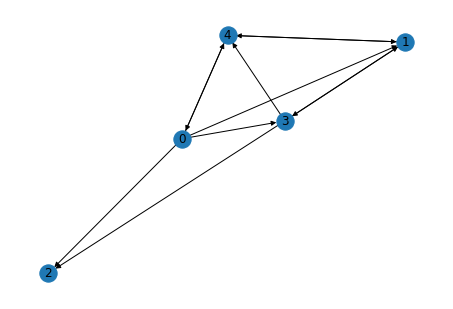

In [47]:
g = nx.DiGraph()
g.add_edge(0, 1)
g.add_edge(0, 2)
g.add_edge(0, 3)
g.add_edge(0, 4)
g.add_edge(1, 3)
g.add_edge(1, 4)
g.add_edge(3, 1)
g.add_edge(3, 2)
g.add_edge(3, 4)
g.add_edge(4, 0)
g.add_edge(4, 1)
nx.draw(g, with_labels=True)
x = nx.strongly_connected_components(g)
for xx in x:
    print(xx)

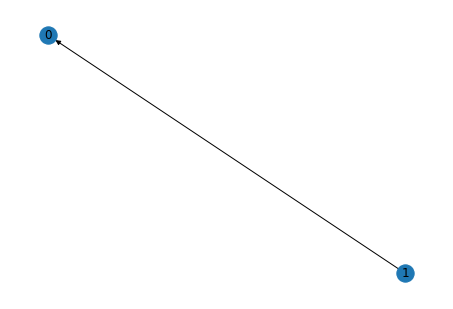

In [48]:
g2 = nx.condensation(g)
nx.draw(g2, with_labels=True)